In [ ]:
import pandas as pd
import requests
from tqdm import tqdm
import seaborn as sns


def get_govsg_df(dataset_id: str) -> pd.DataFrame:
    url = "https://data.gov.sg/api/action/datastore_search?resource_id=" + dataset_id
    response = requests.get(url).json()
    records = response["result"]["records"]
    pbar = tqdm(total=response["result"]["total"], desc=response["result"]["resource_id"])
    pbar.update(len(response["result"]["records"]))
    while response["result"]["records"]:  # returns empty list after last row
        url = "https://data.gov.sg" + response["result"]["_links"]["next"]
        response = requests.get(url).json()
        records += response["result"]["records"]
        pbar.update(len(response["result"]["records"]))
    pbar.close()
    return pd.DataFrame(records)


df = get_govsg_df("d_05fffefe9045d234eb140d7db0acdeb9")
df.head()

d_05fffefe9045d234eb140d7db0acdeb9: 100%|██████████| 3076/3076 [00:13<00:00, 226.26it/s]


,_id,uid,sample,gender,age_2,dwelling,industry,social_involve_1,social_involve_2,social_involve_3,...,hh_employer_their_family,hh_grandchildren,hh_other,hh_none,highest_ed,institution_deg,occupation,mhi,mpi,weight
0,1,27,Resident (Citizen/PR),Female,25-34 years old,HDB 3 room,Wholesale and Retail Trade,No,No,No,...,No,No,No,No,"Secondary/ high school / ""O / N"" Levels",-,"Sales and service staff (e.g. Chefs, Cooks, Ca...","S$3,001-S$4,000","Below S$1,000",0.727891904
1,2,33,Resident (Citizen/PR),Female,25-34 years old,HDB 3 room,Wholesale and Retail Trade,No,No,No,...,No,No,No,No,Polytechnic / diploma,-,Self-employed / Freelancer,"S$2,001-S$3,000","S$1,000-2,000",0.855263478
2,3,46,Resident (Citizen/PR),Female,45-54 years old,HDB 4 room,Not currently working,No,No,No,...,No,No,No,No,"Secondary/ high school / ""O / N"" Levels",-,Home maker,"S$3,001-S$4,000",-,0.857862718
3,4,50,Resident (Citizen/PR),Male,55-64 years old,HDB 4 room,Not currently working,No,No,No,...,No,No,No,No,"Secondary/ high school / ""O / N"" Levels",-,Unemployed,"S$4,001-S$5,000",-,1.000318165
4,5,52,Resident (Citizen/PR),Female,25-34 years old,HDB 3 room,Wholesale and Retail Trade,No,No,No,...,No,No,No,No,"Secondary/ high school / ""O / N"" Levels",-,"Clerical support workers (e.g. Clerks, Custome...","S$6,001-S$7,000","S$2,001-S$3,000",0.855263478


In [2]:
# cleaning the outcome_future column
df["outcome_future"] = df["outcome_future"].str.replace(
    "10 - I have a strong desire to be a part of shaping Singapore’s future", "10"
)
df["outcome_future"] = df["outcome_future"].str.replace(
    "0 - I don’t want to have any part of shaping Singapore’s future", "0"
)
df["outcome_future"] = df["outcome_future"].astype(int)

<Axes: xlabel='outcome_future'>

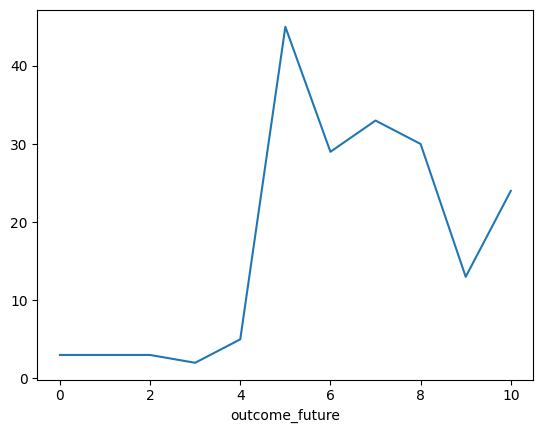

In [3]:
response = df[["dwelling", "outcome_future"]].value_counts(sort=False)
response["HDB 1-2 room"].plot()

<Axes: xlabel='outcome_future'>

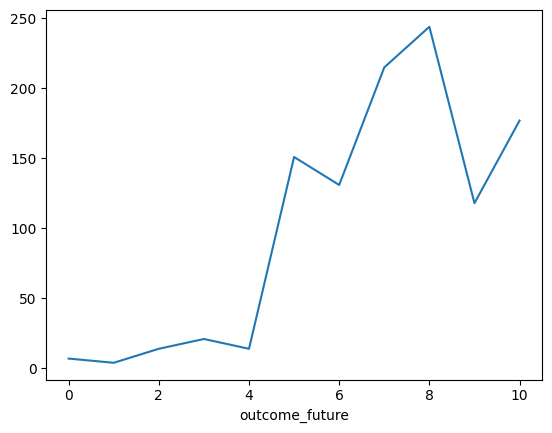

In [4]:
response["HDB 4 room"].plot()

<Axes: xlabel='dwelling'>

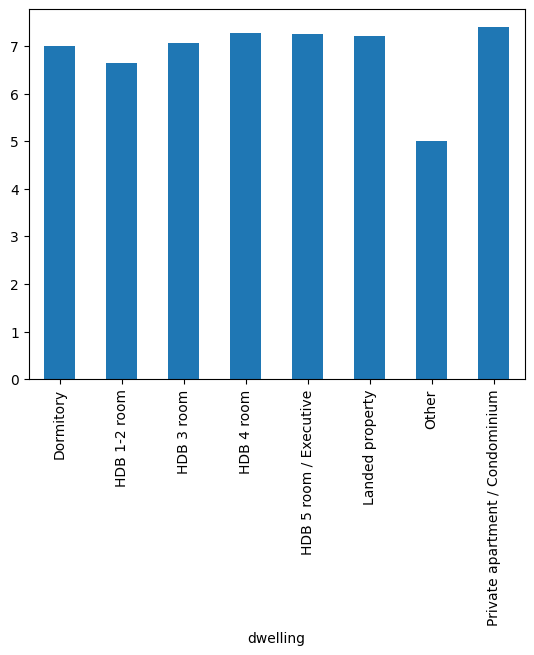

In [5]:
df.groupby("dwelling").outcome_future.mean().plot(kind="bar")

<Axes: xlabel='age_2'>

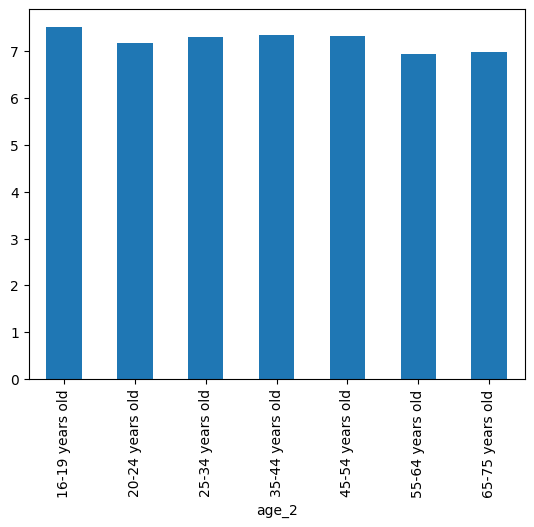

In [7]:
df.groupby("age_2").outcome_future.mean().plot(kind="bar")

<Axes: xlabel='marital_stats'>

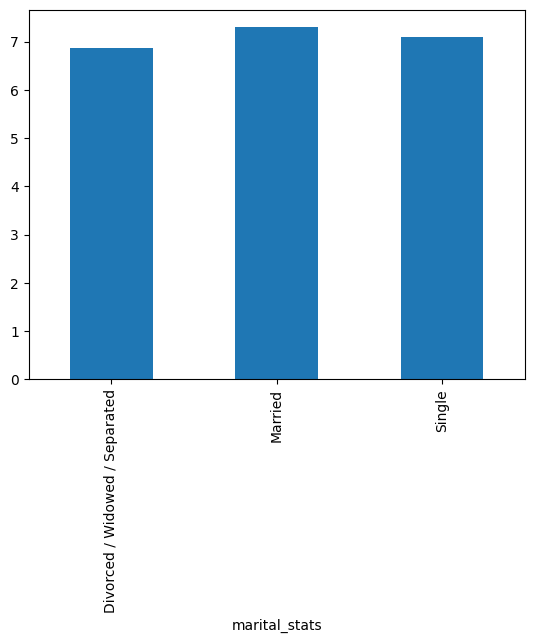

In [13]:
df.groupby("marital_stats").outcome_future.mean().plot(kind="bar")

<Axes: xlabel='highest_ed'>

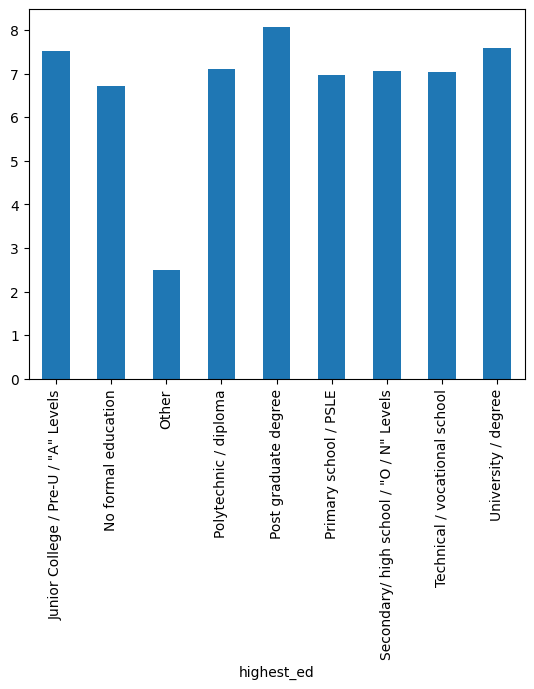

In [14]:
df.groupby("highest_ed").outcome_future.mean().plot(kind="bar")